# Multiple well assay with 0.5 uM Abl WT & Src WT and fresh bosutinib, erlotinib, & DMSO. 

## Tested single wv reads at ex 280/em 480, with emission bandwidth 10 & 20 nm. Only going to analyze the bandwidth 20 nm data. 

In [1]:
import sys

In [2]:
sys.path.append('/Users/goldbee2/pybraries/assaytools/AssayTools')

In [3]:
import platereader

In [4]:
# %load kinase_single_well_spectra_experiment

# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from lxml import etree
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob

import platereader
import platereader

In [5]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])

In [6]:
filenames = sorted(glob('20200923_Timing_Test1.xml'))
filenames.sort(key=os.path.getmtime)

In [7]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(filenames[read])
    reads.append(read)

In [8]:
# set label for which one we want to analyze

label = 'ex280_em480_top_gain100_bw20'

## Extract data for each fluo trace over timecourse

### Abl WT: Bosutinib

In [9]:
# associate reads with correct well, separate protein and buffer into separate arrays
Abl_bos_prot_time = np.zeros([20, 12], np.float64)
Abl_bos_buff_time = np.zeros([20, 12], np.float64)

ncol = 12

abl_bos_prot_wells = list()
abl_bos_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    abl_bos_prot_wells.append(prot_well_name)
    abl_bos_buff_wells.append(buff_well_name)

for n in range(nreads):
    measurements_prot = list([reads[n][label][j] for j in abl_bos_prot_wells])
    measurements_buff = list([reads[n][label][j] for j in abl_bos_buff_wells])
    measurements_prot = [float(i) for i in measurements_prot]
    measurements_buff = [float(i) for i in measurements_buff]
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    Abl_bos_prot_time[n] = np.array(measurements_prot)
    Abl_bos_buff_time[n] = np.array(measurements_buff)

### Abl WT: Erlotinib

In [10]:
# associate reads with correct well, separate protein and buffer into separate arrays
Abl_erl_prot_time = np.zeros([20, 12], np.float64)
Abl_erl_buff_time = np.zeros([20, 12], np.float64)

ncol = 12

abl_erl_prot_wells = list()
abl_erl_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index
    buff_well_name = 'D%s' % index
    abl_erl_prot_wells.append(prot_well_name)
    abl_erl_buff_wells.append(buff_well_name)

for n in range(nreads):
    measurements_prot = list([reads[n][label][j] for j in abl_erl_prot_wells])
    measurements_buff = list([reads[n][label][j] for j in abl_erl_buff_wells])
    measurements_prot = [float(i) for i in measurements_prot]
    measurements_buff = [float(i) for i in measurements_buff]
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    Abl_erl_prot_time[n] = np.array(measurements_prot)
    Abl_erl_buff_time[n] = np.array(measurements_buff)

### Src WT:Bosutinib

In [11]:
# associate reads with correct well, separate protein and buffer into separate arrays
Src_bos_prot_time = np.zeros([20, 12], np.float64)
Src_bos_buff_time = np.zeros([20, 12], np.float64)

ncol = 12

src_bos_prot_wells = list()
src_bos_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    buff_well_name = 'F%s' % index
    src_bos_prot_wells.append(prot_well_name)
    src_bos_buff_wells.append(buff_well_name)

for n in range(nreads):
    measurements_prot = list([reads[n][label][j] for j in src_bos_prot_wells])
    measurements_buff = list([reads[n][label][j] for j in src_bos_buff_wells])
    measurements_prot = [float(i) for i in measurements_prot]
    measurements_buff = [float(i) for i in measurements_buff]
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    Src_bos_prot_time[n] = np.array(measurements_prot)
    Src_bos_buff_time[n] = np.array(measurements_buff)

### Src WT:Erlotinib

In [12]:
# associate reads with correct well, separate protein and buffer into separate arrays
Src_erl_prot_time = np.zeros([20, 12], np.float64)
Src_erl_buff_time = np.zeros([20, 12], np.float64)

ncol = 12

src_erl_prot_wells = list()
src_erl_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'G%s' % index
    buff_well_name = 'H%s' % index
    src_erl_prot_wells.append(prot_well_name)
    src_erl_buff_wells.append(buff_well_name)

for n in range(nreads):
    measurements_prot = list([reads[n][label][j] for j in src_erl_prot_wells])
    measurements_buff = list([reads[n][label][j] for j in src_erl_buff_wells])
    measurements_prot = [float(i) for i in measurements_prot]
    measurements_buff = [float(i) for i in measurements_buff]
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    Src_erl_prot_time[n] = np.array(measurements_prot)
    Src_erl_buff_time[n] = np.array(measurements_buff)

## Create functions for plotting

In [13]:
# plot fluo trace across concentrations with colormap of each timepoint, logx with or without ylim

def fluo_trace_logx(prot, lig, y_prot, y_buff):
    
    for n in range(nreads):
        x_values = concentrations
        color = cm.rainbow(np.linspace(0,1,20))
        for read, c in zip(y_prot, color):
            plt.semilogx(x_values, np.flip(read), c=c, linestyle='solid')
        for read, c in zip(y_buff, color):
            plt.semilogx(x_values, np.flip(read), c=c, linestyle='dotted')
        
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)

        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelsize=16)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=16)
        
        plt.title('%s:%s' % (prot, lig), fontsize =25)
        anchored_text = AnchoredText('Protein = solid \nBuffer = dashed',  loc='upper left', prop=dict(size=16))
        ax1.add_artist(anchored_text)

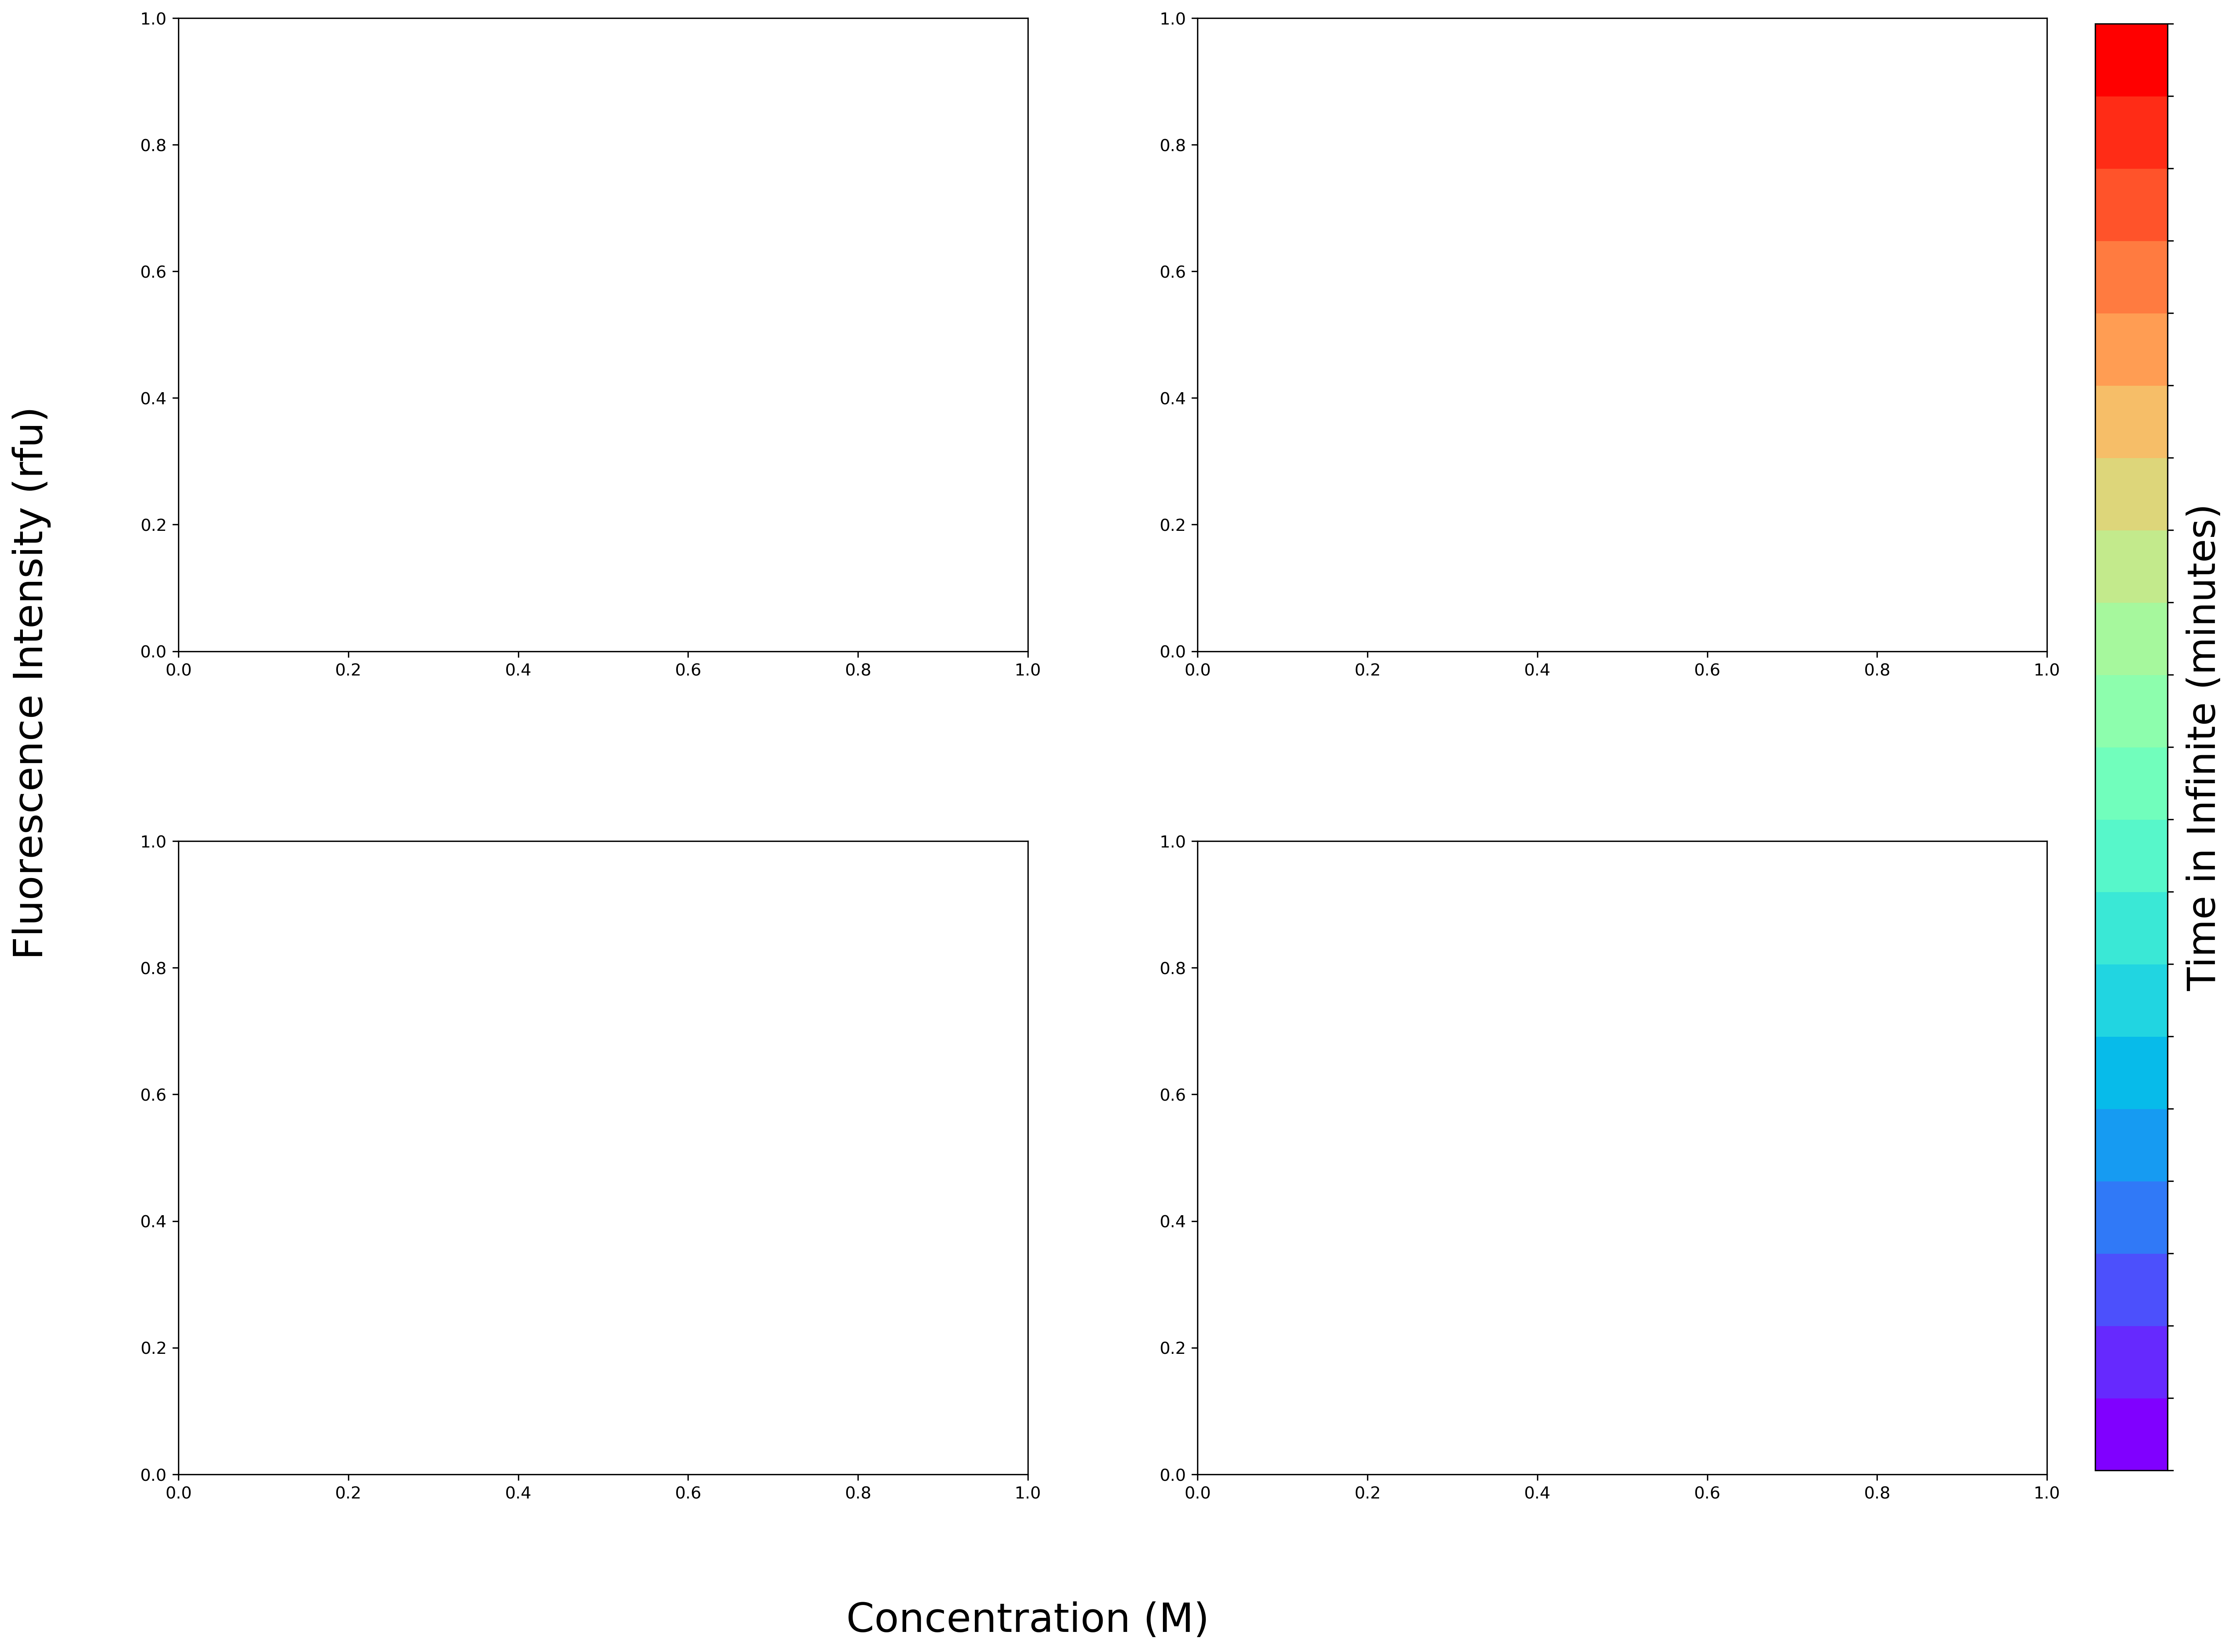

In [14]:
fig = plt.figure(figsize=(20,16), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
Abl_bos = fluo_trace_logx(prot='Abl WT', lig='Bosutinib', y_prot=Abl_bos_prot_time, y_buff=Abl_bos_buff_time)

ax1 = fig.add_subplot(2,2,2)
Abl_erl = fluo_trace_logx(prot='Abl WT', lig='Erlotinib', y_prot=Abl_erl_prot_time, y_buff=Abl_erl_buff_time)

ax1 = fig.add_subplot(2,2,3)
Src_bos = fluo_trace_logx(prot='Src WT', lig='Bosutinib', y_prot=Src_bos_prot_time, y_buff=Src_bos_buff_time)

axis = plt.gca()
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=24)
axis.yaxis.set_label_coords(-0.15,1.25)
plt.xlabel('Concentration (M)', fontsize=24)
axis.xaxis.set_label_coords(1,-0.2)

ax1 = fig.add_subplot(2,2,4)
Src_erl = fluo_trace_logx(prot='Src WT', lig='Erlotinib', y_prot=Src_erl_prot_time, y_buff=Src_erl_buff_time)


cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

time = [i for i in range(nreads)] 
time_mins = [i*5 for i in time]
time_wait = list()
for i in time_mins:
    if i > 45:
        i += 17
    time_wait.append(i)
norm = matplotlib.colors.BoundaryNorm(range(21), cm.rainbow.N)
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=range(21), boundaries=range(21))
cb.set_label('Time in Infinite (minutes)', fontsize=23)
cb.ax.tick_params(labelsize=16)
cb.ax.set_yticklabels(time_wait)

fig.savefig('20200916_fluo_trace_overtime_logx.pdf', bbox_inches='tight', dpi=300)

## Extract and plot data according to time rather than concentration

## WT Abl: Bosutinib

In [15]:
# associate reads with correct well, separate protein and buffer into separate arrays
Abl_bos_prot_timex = np.zeros([12, 20], np.float64)
Abl_bos_buff_timex = np.zeros([12, 20], np.float64)

ncol = 12

abl_bos_prot_wells = list()
abl_bos_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    abl_bos_prot_wells.append(prot_well_name)
    abl_bos_buff_wells.append(buff_well_name)

index = 0

for j,i in zip(reversed(abl_bos_prot_wells),range(ncol)):
    measurements_prot = list([reads[n][label][j] for n in range(nreads)])
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_prot = [float(i) for i in measurements_prot]
    Abl_bos_prot_timex[i] = np.array(measurements_prot)
                         
for j,i in zip(reversed(abl_bos_buff_wells),range(ncol)):
    measurements_buff = list([reads[n][label][j] for n in range(nreads)])
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    measurements_buff = [float(i) for i in measurements_buff]
    Abl_bos_buff_timex[i] = np.array(measurements_buff)

ValueError: could not broadcast input array from shape (0) into shape (20)

## WT Abl: Erlotinib

In [ ]:
# associate reads with correct well, separate protein and buffer into separate arrays
Abl_erl_prot_timex = np.zeros([12, 20], np.float64)
Abl_erl_buff_timex = np.zeros([12, 20], np.float64)

ncol = 12

abl_erl_prot_wells = list()
abl_erl_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index
    buff_well_name = 'D%s' % index
    abl_erl_prot_wells.append(prot_well_name)
    abl_erl_buff_wells.append(buff_well_name)

index = 0

for j,i in zip(reversed(abl_erl_prot_wells),range(ncol)):
    measurements_prot = list([reads[n][label][j] for n in range(nreads)])
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_prot = [float(i) for i in measurements_prot]
    Abl_erl_prot_timex[i] = np.array(measurements_prot)
                         
for j,i in zip(reversed(abl_erl_buff_wells),range(ncol)):
    measurements_buff = list([reads[n][label][j] for n in range(nreads)])
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    measurements_buff = [float(i) for i in measurements_buff]
    Abl_erl_buff_timex[i] = np.array(measurements_buff)

## WT Src:Bosutinib

In [ ]:
# associate reads with correct well, separate protein and buffer into separate arrays
Src_bos_prot_timex = np.zeros([12, 20], np.float64)
Src_bos_buff_timex = np.zeros([12, 20], np.float64)

ncol = 12

src_bos_prot_wells = list()
src_bos_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    buff_well_name = 'F%s' % index
    src_bos_prot_wells.append(prot_well_name)
    src_bos_buff_wells.append(buff_well_name)

index = 0

for j,i in zip(reversed(src_bos_prot_wells),range(ncol)):
    measurements_prot = list([reads[n][label][j] for n in range(nreads)])
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_prot = [float(i) for i in measurements_prot]
    Src_bos_prot_timex[i] = np.array(measurements_prot)
                         
for j,i in zip(reversed(src_bos_buff_wells),range(ncol)):
    measurements_buff = list([reads[n][label][j] for n in range(nreads)])
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    measurements_buff = [float(i) for i in measurements_buff]
    Src_bos_buff_timex[i] = np.array(measurements_buff)

## WT Src:Erlotinib

In [ ]:
# associate reads with correct well, separate protein and buffer into separate arrays
Src_erl_prot_timex = np.zeros([12, 20], np.float64)
Src_erl_buff_timex = np.zeros([12, 20], np.float64)

ncol = 12

src_erl_prot_wells = list()
src_erl_buff_wells = list()

for well in range(ncol):
    index = well + 1
    prot_well_name = 'G%s' % index
    buff_well_name = 'H%s' % index
    src_erl_prot_wells.append(prot_well_name)
    src_erl_buff_wells.append(buff_well_name)

index = 0

for j,i in zip(reversed(src_erl_prot_wells),range(ncol)):
    measurements_prot = list([reads[n][label][j] for n in range(nreads)])
    measurements_prot = [x if x != 'OVER' else 70000 for x in measurements_prot]
    measurements_prot = [float(i) for i in measurements_prot]
    Src_erl_prot_timex[i] = np.array(measurements_prot)
                         
for j,i in zip(reversed(src_erl_buff_wells),range(ncol)):
    measurements_buff = list([reads[n][label][j] for n in range(nreads)])
    measurements_buff = [x if x != 'OVER' else 70000 for x in measurements_buff]
    measurements_buff = [float(i) for i in measurements_buff]
    Src_erl_buff_timex[i] = np.array(measurements_buff)

## Create more plotting functions

In [16]:
# plot fluo values across time with colormap of each concentration 

def fluo_time_plot(prot, lig, y_prot, y_buff):

    for i in range(ncol):
        # create list of timepoints (20 reads that take 5 mins per read, 17 minute wait time after the first 10 reads)
        time = [i for i in range(nreads)] 
        time_mins = [i*5 for i in time]
        time_wait = list()
        for i in time_mins:
            if i > 45:
                i += 17
            time_wait.append(i)
            
        x_values_time = time_wait
        
        color = cm.rainbow(np.linspace(0,1,12))
        for read, c in zip(y_prot, color):
            plt.plot(x_values_time, read, c=c, linestyle='solid', linewidth=2)
        for read, c in zip(y_buff, color):
            plt.plot(x_values_time, read, c=c, linestyle='dotted', linewidth=2)
        
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)

        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelsize=16)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=16)
        
        plt.title('%s:%s' % (prot, lig), fontsize =25)
        anchored_text = AnchoredText('Protein = solid, Buffer = dashed',  loc='upper right', prop=dict(size=16))
        ax1.add_artist(anchored_text)

ValueError: x and y must have same first dimension, but have shapes (0,) and (20,)

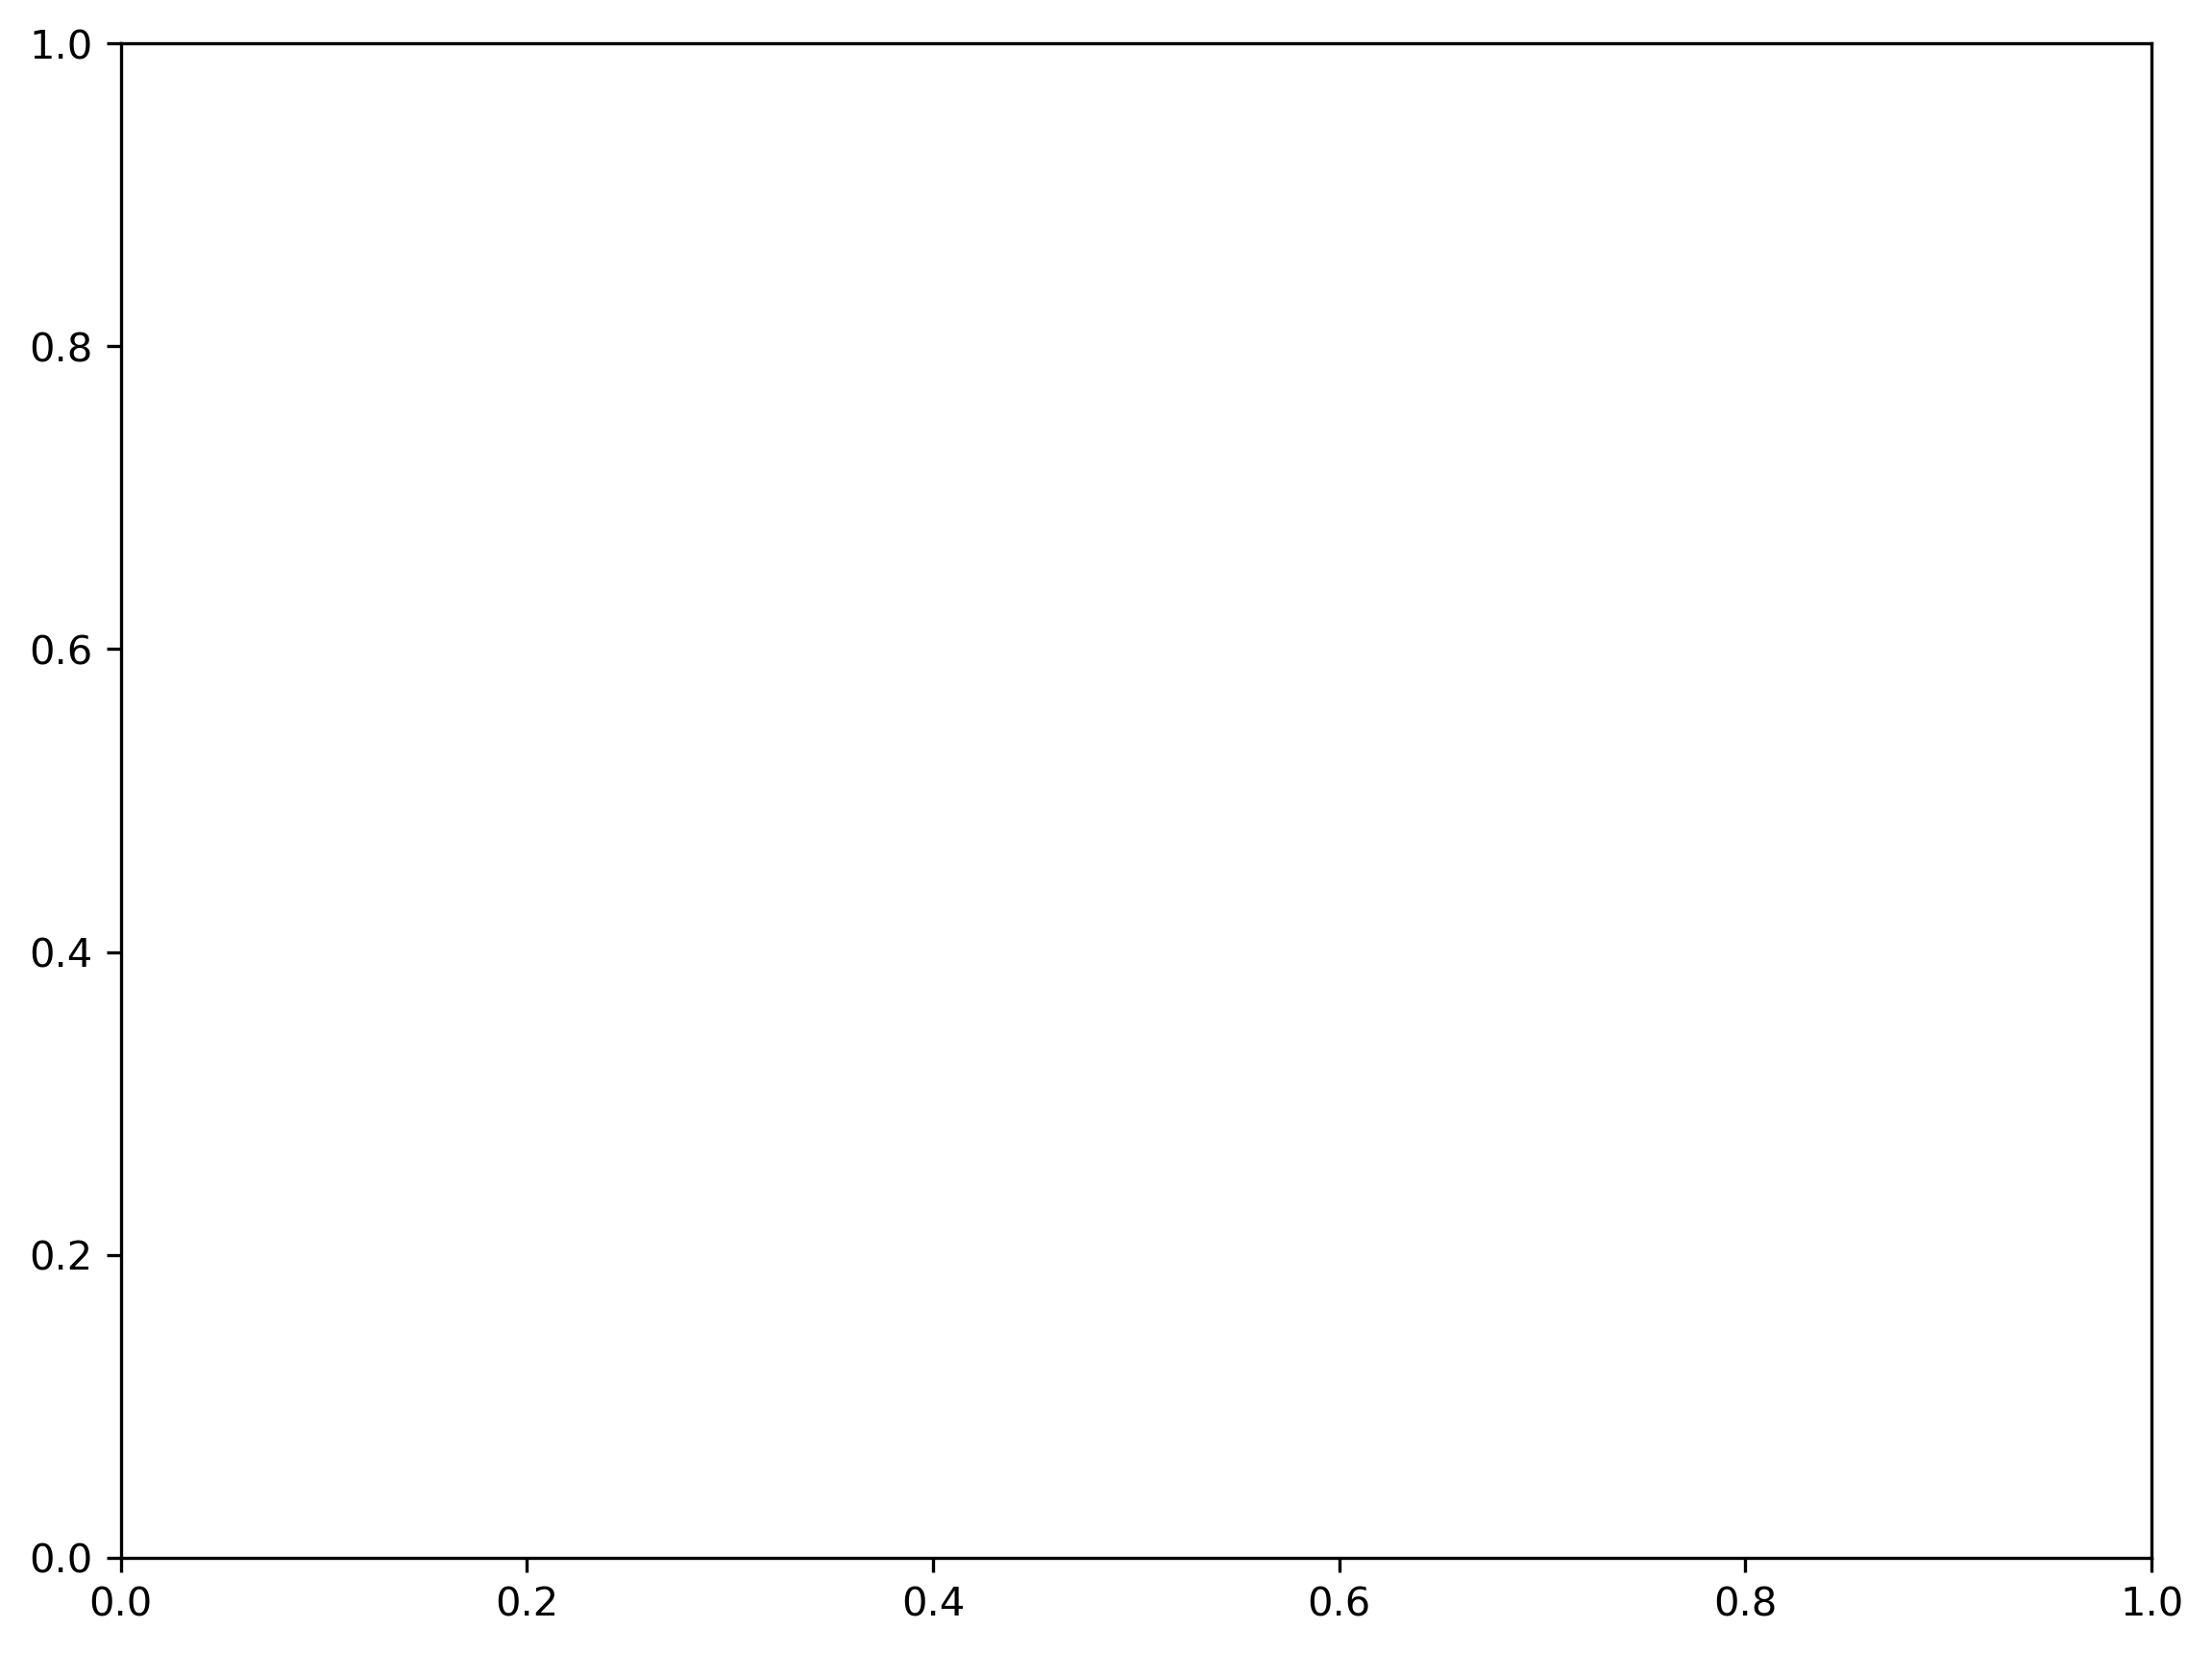

In [17]:
# ncol = 12
nrows=2
ncols=2

fig = plt.figure(figsize=(20,16), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
Abl_bos = fluo_time_plot(prot='Abl WT', lig='Bosutinib', y_prot=Abl_bos_prot_timex, y_buff=Abl_bos_buff_timex)

ax1 = fig.add_subplot(2,2,2)
Abl_erl = fluo_time_plot(prot='Abl WT', lig='Erlotinib', y_prot=Abl_erl_prot_timex, y_buff=Abl_erl_buff_timex)

ax1 = fig.add_subplot(2,2,3)
Src_bos = fluo_time_plot(prot='Src WT', lig='Bosutinib', y_prot=Src_bos_prot_timex, y_buff=Src_bos_buff_timex)

axis = plt.gca()
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=24)
axis.yaxis.set_label_coords(-0.15,1.25)
plt.xlabel('Time (minutes)', fontsize=24)
axis.xaxis.set_label_coords(1,-0.2)

ax1 = fig.add_subplot(2,2,4)
Src_erl = fluo_time_plot(prot='Src WT', lig='Erlotinib', y_prot=Src_erl_prot_timex, y_buff=Src_erl_buff_timex)

cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

micro_concentrations = np.multiply(concentrations, 1e6)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
cb.set_label('Ligand Concentration ($\mu$M)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(conc_labels)


fig.savefig('20200916_well_values_overtime.pdf', bbox_inches='tight', dpi=300)